# Data overview

* Source: www.lolesports.com
* Provider: https://www.kaggle.com/braydenrogowski/league-of-legends-worlds-2021-playin-group-stats
* License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)


The data were collected by a LOL's fan. The data were about game stats for all matches in the League of Legends Worlds 2021 Play-in Groups.

Attributes details:
* **Team:** Code of team
* **Player:** Tag of player
* **Opponent:** Code of opposing team in match
* **Position:** Position played by player in match
* **Champion:** Champion played by player in match
* **Kills:** Number of kills by player in match
* **Deaths:** Number of deatchs by player in match
* **Assists:** Number of assists by player in match
* **Creep Score:** Number of minions and monsters killed by player in match
* **Gold Earned:** Gold earned by player in match
* **Champion Damage Share:** Percentage of total damage done by team to other champions done by player
* **Kill Participation:** Percentage of team kills that player was part of
* **Wards Placed:** Number of wards placed by player in match
* **Wards Destroyed:** Number of wards killed by player in match
* **Wards Interactions:** Sum of wards placed and wards killed by player in match
* **Dragons For:** Number of dragons team killed in match
* **Dragons Against:** Number of dragons opposing team killed in match
* **Barons For:** Number of Barons killed in match
* **Barons Against:** Number of Barons opposing team killed in match
* **Result:** Win or Lose (W/L)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Setup

In [26]:
plt.style.use('seaborn')

# Data description

In [3]:
df = pd.read_csv("lol2021.csv", sep=',')
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


In [4]:
df.describe()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.709091,2.718182,5.668182,200.340909,11008.159091,0.200000,0.608273,19.454545,8.704545,28.159091,2.090909,2.090909,0.545455,0.545455
std,2.579673,1.747179,3.888149,101.328153,3198.806207,0.095051,0.190404,15.713553,5.101614,18.051857,1.381849,1.381849,0.657050,0.657050
min,0.000000,0.000000,0.000000,14.000000,4714.000000,0.040000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,156.000000,8691.250000,0.130000,0.500000,10.000000,5.000000,17.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,3.000000,5.000000,210.000000,10454.500000,0.205000,0.625000,14.000000,7.000000,22.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,4.000000,8.000000,266.250000,13431.750000,0.260000,0.740000,19.000000,12.000000,30.500000,3.250000,3.250000,1.000000,1.000000
max,13.000000,7.000000,19.000000,419.000000,20546.000000,0.470000,1.000000,92.000000,30.000000,112.000000,4.000000,4.000000,2.000000,2.000000


**Comment:** Nothing special

In [5]:
df.isna().sum()

Team                     0
Player                   0
Opponent                 0
Position                 0
Champion                 0
Kills                    0
Deaths                   0
Assists                  0
Creep Score              0
Gold Earned              0
Champion Damage Share    0
Kill Participation       0
Wards Placed             0
Wards Destroyed          0
Ward Interactions        0
Dragons For              0
Dragons Against          0
Barons For               0
Barons Against           0
Result                   0
dtype: int64

**Comment:** No missing data

In [6]:
df.dtypes

Team                      object
Player                    object
Opponent                  object
Position                  object
Champion                  object
Kills                      int64
Deaths                     int64
Assists                    int64
Creep Score                int64
Gold Earned                int64
Champion Damage Share    float64
Kill Participation       float64
Wards Placed               int64
Wards Destroyed            int64
Ward Interactions          int64
Dragons For                int64
Dragons Against            int64
Barons For                 int64
Barons Against             int64
Result                    object
dtype: object

In [7]:
df['Team'].unique()

array(['UOL', 'GS', 'DFM', 'C9', 'BYG', 'HLE', 'INF', 'LNG', 'PCE', 'RED'],
      dtype=object)

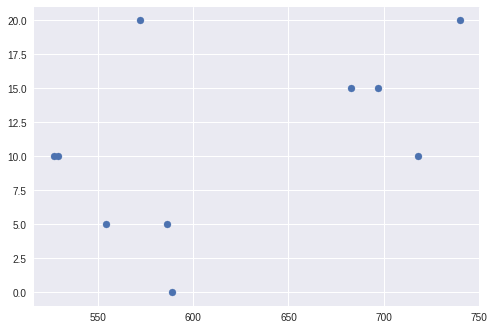

In [27]:
wards_interaction = df[['Team', 'Ward Interactions']].groupby(
    'Team').agg(['sum']).values.reshape((1, -1))[0]
le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])
wins = df[['Team', 'Result']].groupby('Team').agg(
    ['sum']).values.reshape((1, -1))[0]
plt.scatter(x=wards_interaction, y=wins);

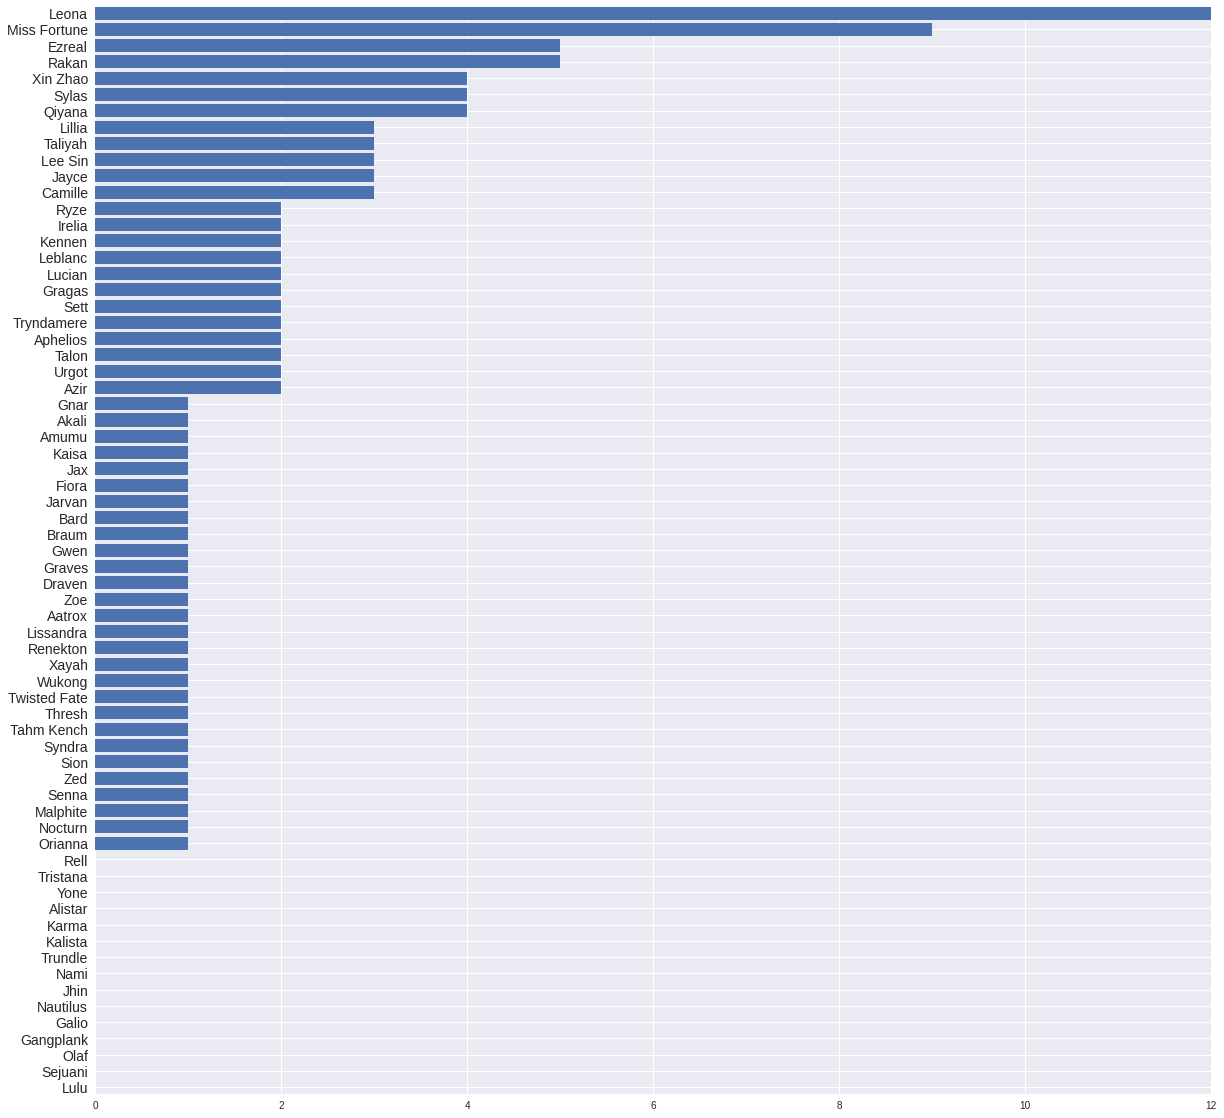

In [46]:
tmp = df[['Champion', 'Result']].groupby('Champion').agg(['sum'])
champion = tmp.index
wins = tmp.values.reshape((1, -1))[0]
idx = np.argsort(wins)
champion = champion[idx]
wins = wins[idx]
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(champion, wins)
ax.margins(0)
ax.tick_params(axis='y', labelsize=14);

In [10]:
plt.cm.get_cmap

<function matplotlib.cm.get_cmap(name=None, lut=None)>

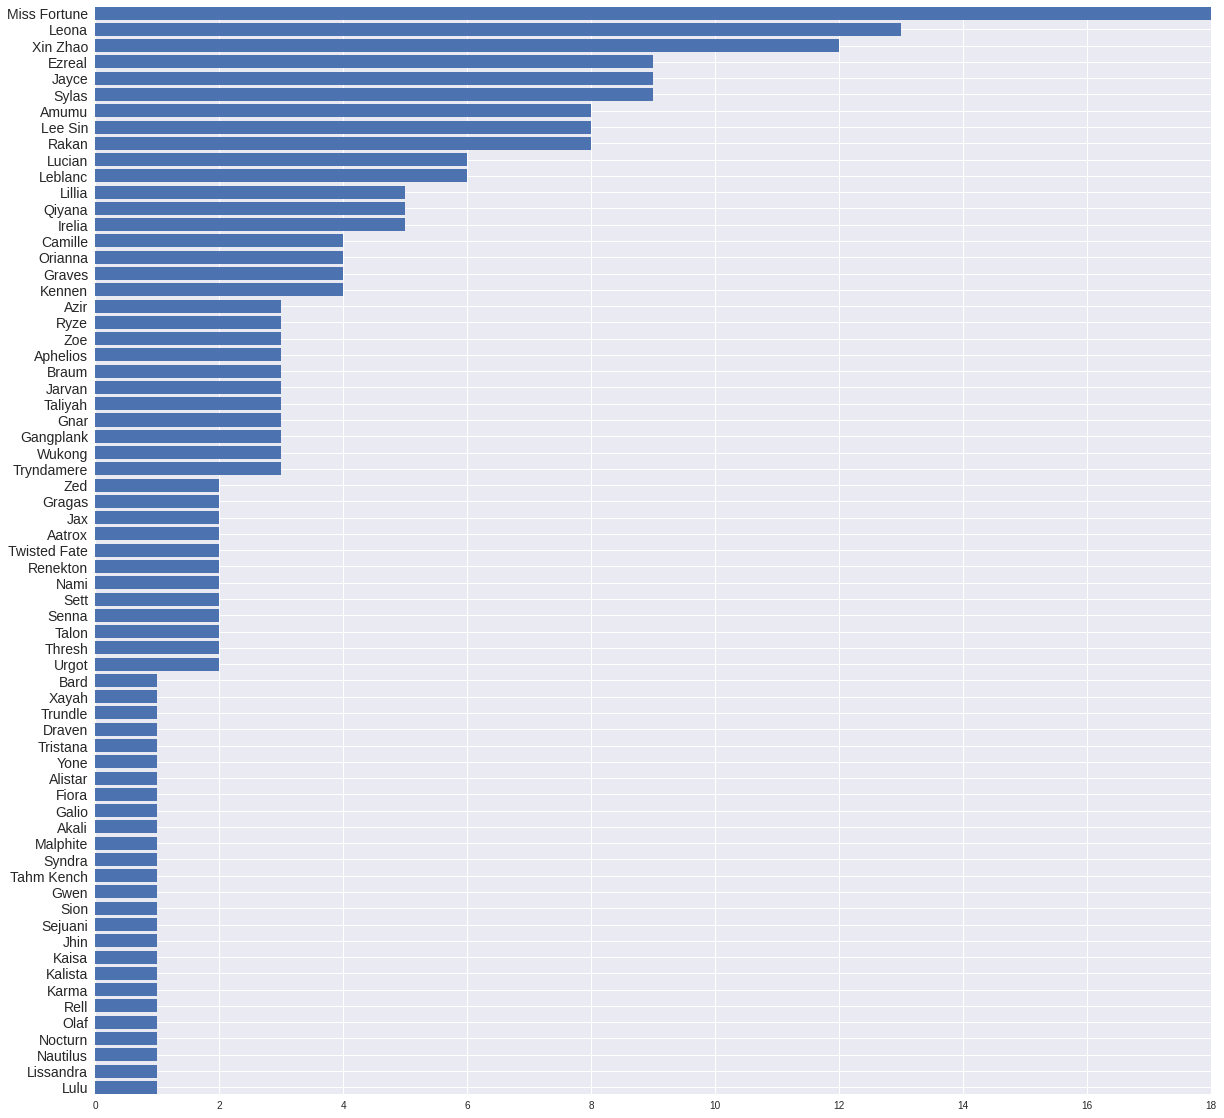

In [47]:
tmp = df[['Champion', 'Result']].groupby('Champion').agg(['size'])
champion = tmp.index
pick_counts = tmp.values.reshape((1, -1))[0]
idx = np.argsort(pick_counts)
champion = champion[idx]
pick_counts = pick_counts[idx]
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(champion, pick_counts)
ax.margins(0)
ax.tick_params(axis='y', labelsize=14);